<a href="https://colab.research.google.com/github/mohammedterry/ANNs/blob/master/ANN_NeuroEvo_ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -O https://pmcvariety.files.wordpress.com/2018/04/twitter-logo.jpg?w=100&h=100&crop=1
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3593  100  3593    0     0  35930      0 --:--:-- --:--:-- --:--:-- 35930
 sample_data  'twitter-logo.jpg?w=100'


In [0]:
from PIL import Image
image = Image.open('twitter-logo.jpg?w=100')

In [0]:
import numpy as np
image_array = np.asarray(image)

In [0]:
training_inputs,training_outputs = [],[]
for row,rgbs in enumerate(image_array):
  for column,rgb in enumerate(rgbs):
    training_inputs.append(np.array([row,column]))
    r,g,b = rgb
    training_outputs.append(np.array([r/255,g/255,b/255]))

# NeuroEvolution

In [0]:
import numpy as np
import random

class FFNN:
  def __init__(self, weights):
    self.weights = weights
  
  def _f(self,x): #activation function: sigmoid
    return 1. / (1. + np.exp(-x))
  
  def __call__(self, x): #forward pass through each layer in the deep ffnn
    for w in self.weights:
      x = self._f(x @ w)
    return x

class GA:
  evolutionary_history = [0]
  #hyperparameters
  n_hidden = 10
  alpha = .1
  max_generations = 40
  population_size = 40
  p_perturb_weight = 1
  p_mutate_weight = 1
  p_mutate_layer = .5
  p_add_layer = .1

  def __init__(self,n_inputs,n_outputs,x_test,y_test):
    self.n_inputs, self.n_outputs = n_inputs,n_outputs 
    self.genomes = [[np.random.randn(self.n_inputs,self.n_hidden),np.random.randn(self.n_hidden,self.n_outputs)] for _ in range(self.population_size)]  #each genome is a 2D matrix of synapse weights for each layer in ffnn
    self.x_test = x_test
    self.y_test = y_test
    
  def fitness(self, weights):
    ann = FFNN(weights)
    y_predicted = np.array([ann(x) for x in self.x_test])
    rms_error = np.sum((self.y_test - y_predicted)**2)**.5 / len(self.y_test)
    return 1-rms_error
  
  def rank(self,genomes):
    self.fitnesses = [self.fitness(genome) for genome in genomes]
    self.evolutionary_history.append( max(self.fitnesses) )
    return [genomes[i] for _,i in sorted(zip(self.fitnesses,[i for i in range(len(self.fitnesses))]), reverse=True)] #rank genomes by fitness

  def mutate(self,genomes):
    def noise(x):
      return x + np.random.uniform(-self.alpha,self.alpha) if np.random.random() <= self.p_perturb_weight else np.random.uniform(-1,1) if np.random.random() <= self.p_mutate_weight else x
    noise = np.vectorize(noise) 

    for i,weights in enumerate(genomes):   
      genomes[i] = [noise(layer) if random.random() <= self.p_mutate_layer else layer for layer in weights] #change some weights
      if np.random.random() <= self.p_add_layer: #add another hidden layer 
        pointer = np.random.randint(1,len(weights)) #add it inbetween the input and output layers
        genomes[i] = weights[:pointer] + [np.random.randn(self.n_hidden,self.n_hidden)] + weights[pointer:]                  
    return genomes
  
  def crossover(self,genome1,genome2): #one-point crossover
    pointer1 = np.random.randint(1,len(genome1))
    pointer2 = np.random.randint(1,len(genome2))
    new_genome1 = genome1[:pointer1] + genome2[pointer2:]
    new_genome2 = genome2[:pointer2] + genome1[pointer1:]
    return new_genome1, new_genome2
  
  def mate(self,genome1,genome2):
    child1,child2 = self.crossover(genome1,genome2)
    return genome1, genome2, child1, child2 # returns x2 parents & x2 children (i.e. mixtures of both parents)
  
  def g_algorithm(self):
    self.best_genome = self.rank(self.genomes)[0]
    fitness_total = sum(self.fitnesses)
    elite_indexes = np.random.choice(len(self.genomes), (self.population_size // 4) -1, p= [f/fitness_total for f in self.fitnesses]) #randomly sample quarter of new population from the old using fitness to determine probability of being sampled 
    elites = [self.genomes[i] for i in elite_indexes]
    offspring = [child for parent1,parent2 in zip(elites,random.sample(elites, len(elites))) for child in self.mate(parent1,parent2) ]  #elite's offspring replace population (4 children for every genome)
    self.genomes = self.mutate(offspring) + [self.best_genome] + [[np.random.randn(self.n_inputs,self.n_hidden), np.random.randn(self.n_hidden,self.n_outputs)] for _ in range(3)] #new population is offspting and the best parent (in case all children are worse) and three new random genomes (in case the current gene pool simply isnt good enough)
    
  def evolve(self):
    for generation in range(self.max_generations):
      self.g_algorithm()
      print(generation, self.evolutionary_history[-1])
      

In [0]:
g = GA(2,3,training_inputs,training_outputs)
g.evolve()
best_weight = g.best_genome

0 0.9933505203947316
1 0.9951896286027914
2 0.9951896286027914
3 0.9951896286027914
4 0.9951896286027914
5 0.9956011793951844
6 0.9956011793951844
7 0.9956011793951844
8 0.9956011793951844
9 0.9956011793951844
10 0.9956011793951844
11 0.9956011793951844
12 0.9956011793951844
13 0.9957616186208411
14 0.9957616186208411
15 0.9957616186208411
16 0.9961449015433846
17 0.9961449015433846
18 0.9961449015433846
19 0.9961449015433846
20 0.9961449015433846
21 0.9961449015433846
22 0.9962546338929191
23 0.9963209246569321
24 0.9963209246569321
25 0.9963209246569321
26 0.9963209246569321
27 0.9963209246569321
28 0.9963209246569321
29 0.9963209246569321
30 0.9963408101611082
31 0.9963408101611082
32 0.9963408101611082
33 0.9963408101611082
34 0.9963408101611082
35 0.9963408101611082
36 0.9963408101611082
37 0.9963450575974551
38 0.9963450575974551
39 0.9963450575974551


Text(0, 0.5, 'fitness')

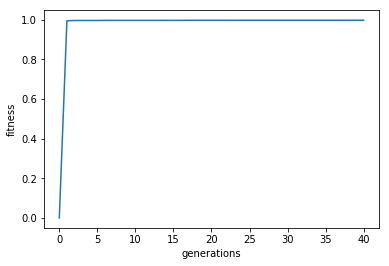

In [0]:
import matplotlib.pyplot as plt
plt.plot(g.evolutionary_history)
plt.xlabel('generations')
plt.ylabel('fitness')

In [0]:
best_weight

[array([[-1.03772758,  0.01593137,  2.15622101, -1.54246166,  0.16623642,
          0.88023738, -0.19629725,  1.8532937 ,  0.36958075,  0.1726099 ],
        [ 1.18598835,  0.16338194, -0.02530909,  0.38323158,  0.7296611 ,
          1.26240881, -0.53424709, -0.33897982,  0.98091552,  0.3421445 ]]),
 array([[-1.10902259,  0.05770393,  1.23692538,  0.79156978,  1.49578936,
          0.39699429, -0.79960484, -0.43247646,  0.88565903,  1.5447115 ],
        [ 0.24267635, -2.83284181,  0.90841263, -1.07828208, -0.38967772,
          0.29574081, -0.32653917, -2.18986457,  1.01111437,  0.11971026],
        [-1.79105285,  0.07369092, -0.5204834 , -0.69873363, -1.25271548,
          0.12317764, -0.70636956,  1.66107063,  2.04642184, -0.56927134],
        [ 0.62780969, -1.86519746, -0.03476933,  1.56100088,  0.20566031,
         -1.37214072,  0.62643336,  1.79312734,  1.12476221,  1.31594007],
        [-0.42625556, -0.92969545,  1.01033424,  0.18800239,  0.34526087,
          1.3478651 , -1.23928

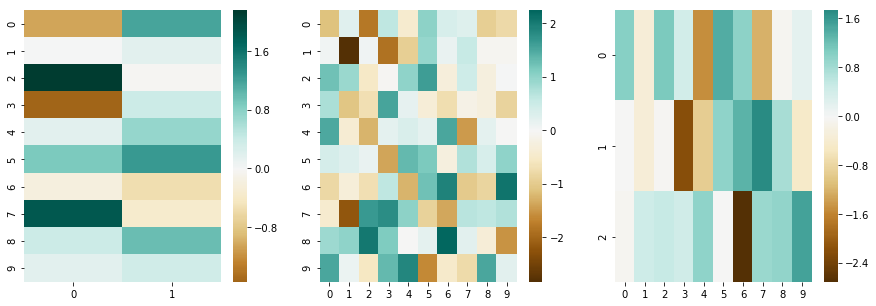

In [0]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(1, len(best_weight),figsize=(15, 5) )
import pandas as pd
import seaborn as sns
for layer in range(len(best_weight)):
  sns.heatmap(pd.DataFrame({f'{i}':w for i,w in enumerate(best_weight[layer])}),center=0,cmap="BrBG",ax=axes[layer])

In [0]:
evolved_ann = FFNN(best_weight)
evolved_ann([1,1])

array([0.80964743, 0.9217896 , 0.93527353])

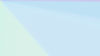

In [0]:
predicted_outputs = evolved_ann(training_inputs)

predicted_image_array = np.zeros_like(image_array)
i = 0
for row,rgbs in enumerate(predicted_image_array):
  for column in range(len(rgbs)):
    r,g,b = predicted_outputs[i]
    predicted_image_array[row][column] = [r*255,g*255,b*255]
    i += 1
Image.fromarray(predicted_image_array)

# Extreme Learning Machine

In [0]:
import numpy as np

class ELM:
  def __init__(self, n_inputs: int, n_hidden = 3000):
    self.random_weights = np.random.normal(size=[n_inputs, n_hidden])
    
  def learn(self, X: np.ndarray, Y: np.ndarray):
    H = self._hidden_layer(X)
    self.output_weights = np.linalg.pinv(H) @ Y
    
  def _f(self, x: np.ndarray): 
    return 1. / (1. + np.exp(-x)) #activation function: sigmoid
    
  def _hidden_layer(self, inputs: np.ndarray): 
    return self._f(inputs @ self.random_weights)
  
  def _output_layer(self, hidden: np.ndarray): 
    return hidden @ self.output_weights
  
  def __call__(self, inputs: np.ndarray):  #infer
    return self._output_layer(self._hidden_layer(inputs))

In [0]:
elm = ELM(2)
elm.learn(np.array(training_inputs), np.array(training_outputs))

In [0]:
elm([1,1])

array([0.95012379, 0.94977713, 0.94932604])

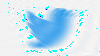

In [0]:
predicted_outputs = elm(training_inputs)

predicted_image_array = np.zeros_like(image_array)
i = 0
for row,rgbs in enumerate(predicted_image_array):
  for column in range(len(rgbs)):
    r,g,b = predicted_outputs[i]
    predicted_image_array[row][column] = [r*255,g*255,b*255]
    i += 1
Image.fromarray(predicted_image_array)